In [1]:
import os
os.getcwd()

'C:\\Users\\srinu\\Desktop\\Remote Internship 2020\\project\\datasets'

In [2]:
os.chdir("C:/Users/srinu/Desktop/Remote Internship 2020/project/datasets")

In [3]:
os.getcwd()

'C:\\Users\\srinu\\Desktop\\Remote Internship 2020\\project\\datasets'

# Importing Libraries


In [4]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

# Model Building

In [5]:
#Import Keras.
from matplotlib import pyplot 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam

Using TensorFlow backend.
C:\Users\srinu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\srinu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\srinu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\srinu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [6]:
ign_dir = os.path.join('trainset/igneous')
meta_dir = os.path.join('trainset/metamorphic')
sedi_dir = os.path.join('trainset/sedimentary')

print('total training igneous rock images:', len(os.listdir(ign_dir)))
print('total training metamorphic rock images:', len(os.listdir(meta_dir)))
print('total training sedimentary rock images:', len(os.listdir(sedi_dir)))

total training igneous rock images: 141
total training metamorphic rock images: 122
total training sedimentary rock images: 142


In [7]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "testset"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "trainset"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(64,64),
	class_mode='categorical',
  batch_size=60
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(64,64),
	class_mode='categorical',
  batch_size=60
)

Found 172 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


In [9]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64,64, 3)),
    tf.keras.layers.MaxPooling2D(3, 3),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    
    tf.keras.layers.Flatten(),

    
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=60,  
      epochs=25,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

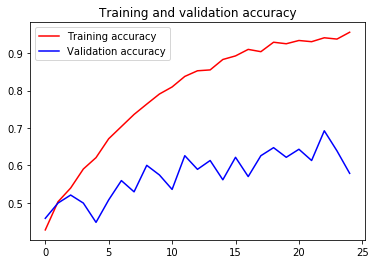

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [16]:
from keras.models import load_model
import numpy as np
import cv2
model.save('mymodel.h5')
#model.compile(loss='categorical_crossentropy',
  #                   optimizer='adam',
  #                    metrics=['accuracy'])
from skimage.transform import resize

def detect(frame):
        img = resize(frame,(64,64))
        img = np.expand_dims(img,axis=0)
        if(np.max(img)>1):
            img = img/255.0
        prediction = model.predict(img)
        print(prediction)
        prediction = model.predict_classes(img)
        print(prediction)
    


In [20]:
frame=cv2.imread(r"C:/Users/srinu/Desktop/Remote Internship 2020/project/datasets/trainset/sedimentary/1.jpg")
data = detect(frame)

[[0.26152575 0.00132858 0.73714566]]
[2]
